In [98]:
! pip install squarify

import squarify
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

import mlxtend
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [99]:
#Part 1

In [100]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

df=pd.DataFrame(dataset)
df

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


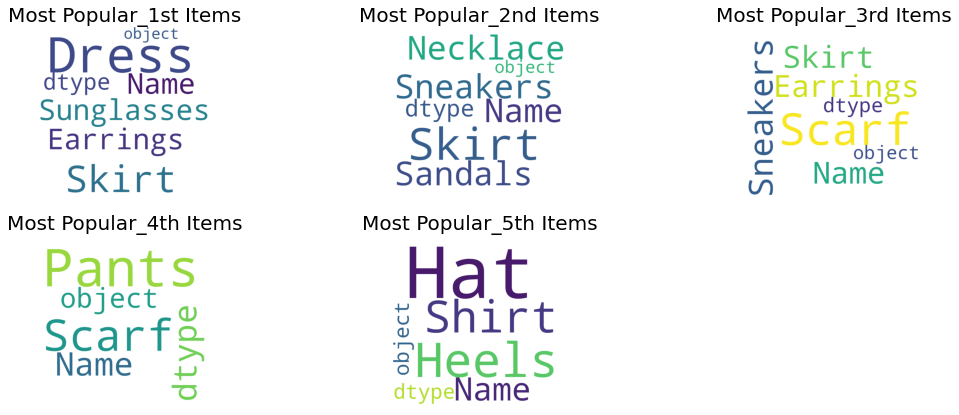

In [101]:
plt.rcParams['figure.figsize'] = (18, 7)

# 1st Item

plt.subplot2grid ((2,3),(0,0))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_1st Items',fontsize = 20)

# 2nd Item

plt.subplot2grid ((2,3),(0,1))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[1]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_2nd Items',fontsize = 20)

# 3rd Item

plt.subplot2grid ((2,3),(0,2))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[2]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_3rd Items',fontsize = 20)

# 4th Item

plt.subplot2grid ((2,3),(1,0))
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[3]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_4th Items',fontsize = 20)

# 5th Item

plt.subplot2grid ((2,3),(1,1))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[4]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_5th Items',fontsize = 20)

plt.show()


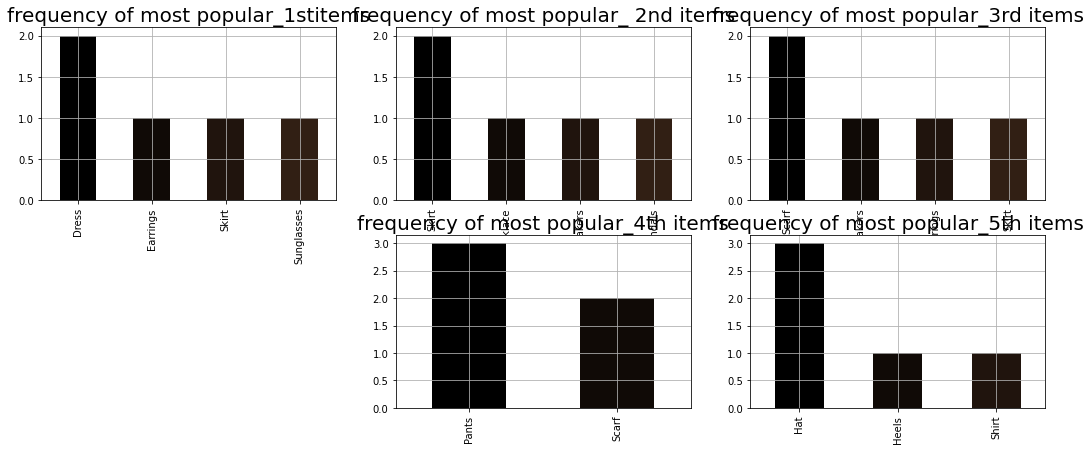

In [102]:
plt.rcParams['figure.figsize'] = (18, 7)

# 1st Item

plt.subplot2grid ((2,3),(0,0))
color = plt.cm.copper(np.linspace(0, 1, 20))
df[0].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_1stitems', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

# 2nd Item

plt.subplot2grid ((2,3),(0,1))
color = plt.cm.copper(np.linspace(0, 1, 20))
df[1].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_ 2nd items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

# 3rd Item

plt.subplot2grid ((2,3),(0,2))
color = plt.cm.copper(np.linspace(0, 1, 20))
df[2].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_3rd items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

# 4th Item

plt.subplot2grid ((2,3),(1,1))
color = plt.cm.copper(np.linspace(0, 1, 20))
df[3].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_4th items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

plt.subplot2grid ((2,3),(1,2))
color = plt.cm.copper(np.linspace(0, 1, 20))
df[4].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_5th items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()


plt.show()

In [103]:
#1-priori Preparation

In [104]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    
df=pd.DataFrame(te_ary, columns=te.columns_)  
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [105]:
#2-Support with column names

In [106]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [107]:
#Confidence

In [108]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [109]:
#Lift

In [110]:
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [111]:
#Association Rules_Part2
#Market Basket Optimisation Association Rules

In [112]:
data=pd.read_csv('Market_Basket_Optimisation.csv',header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
data.shape

(7501, 20)

In [114]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [115]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
3883,frozen vegetables,whole wheat pasta,tomato sauce,rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,grated cheese,mineral water,cooking oil,french fries,cookies,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6559,eggs,whole wheat rice,energy drink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1275,turkey,ground beef,eggs,burger sauce,chicken,barbecue sauce,cereals,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2205,frozen vegetables,tomatoes,butter,eggs,cake,bug spray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3619,mineral water,energy bar,salmon,cooking oil,shallot,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1287,ham,mineral water,olive oil,oil,carrots,cottage cheese,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1194,whole wheat rice,yogurt cake,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4016,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5747,shrimp,frozen vegetables,eggs,oil,barbecue sauce,chili,whole weat flour,french fries,cookies,brownies,pancakes,energy drink,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
x = data[0].value_counts().head(100).to_frame()
x.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey', 'cereals',
       'candy bars', 'strawberries', 'yams', 'oil', 'tomato sauce', 'brownies',
       'cooking oil', 'french wine', 'flax seed', 'antioxydant juice',
       'energy drink', 'cottage cheese', 'protein bar', 'fromage blanc',
       'fresh bread', 'nonfat milk', 'pasta', 'tomato juice', 'gums',
       'almonds', 'light mayo', 'cider', 'soda', 'min

In [117]:
#Data Visualization

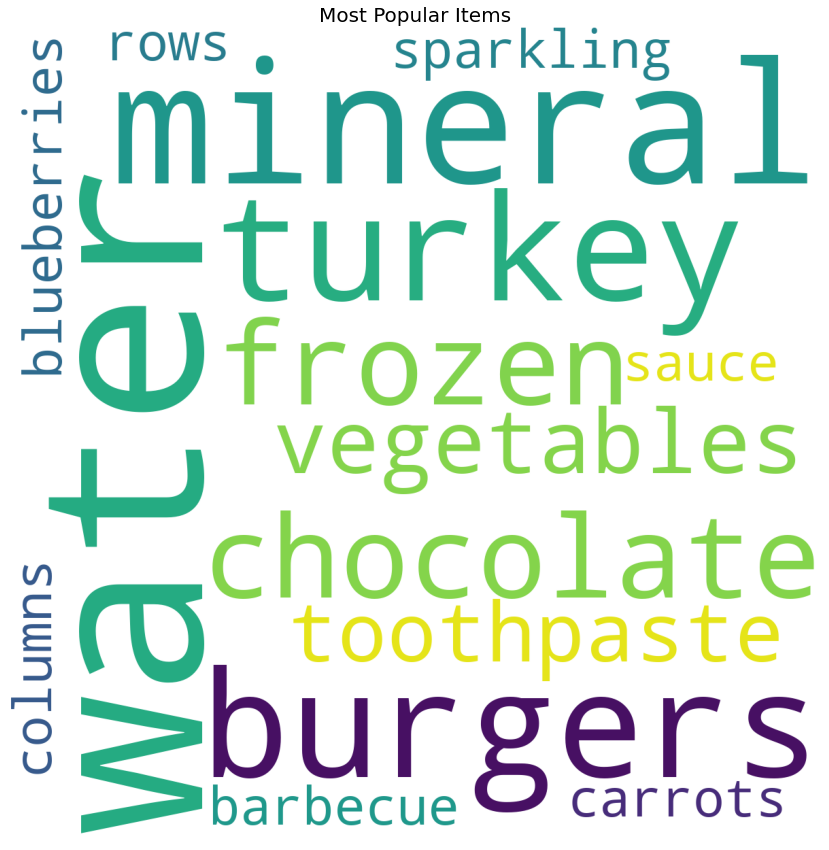

In [118]:
#Data vizualisation by Wordcloud
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

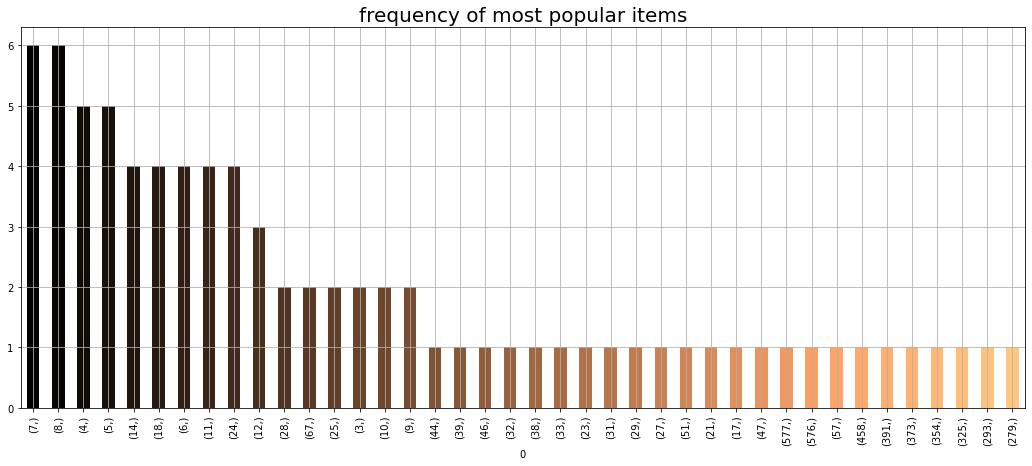

In [119]:
#Data vizualisation by Bar graph
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
x.value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [120]:
#Data vizualisation by Networkx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

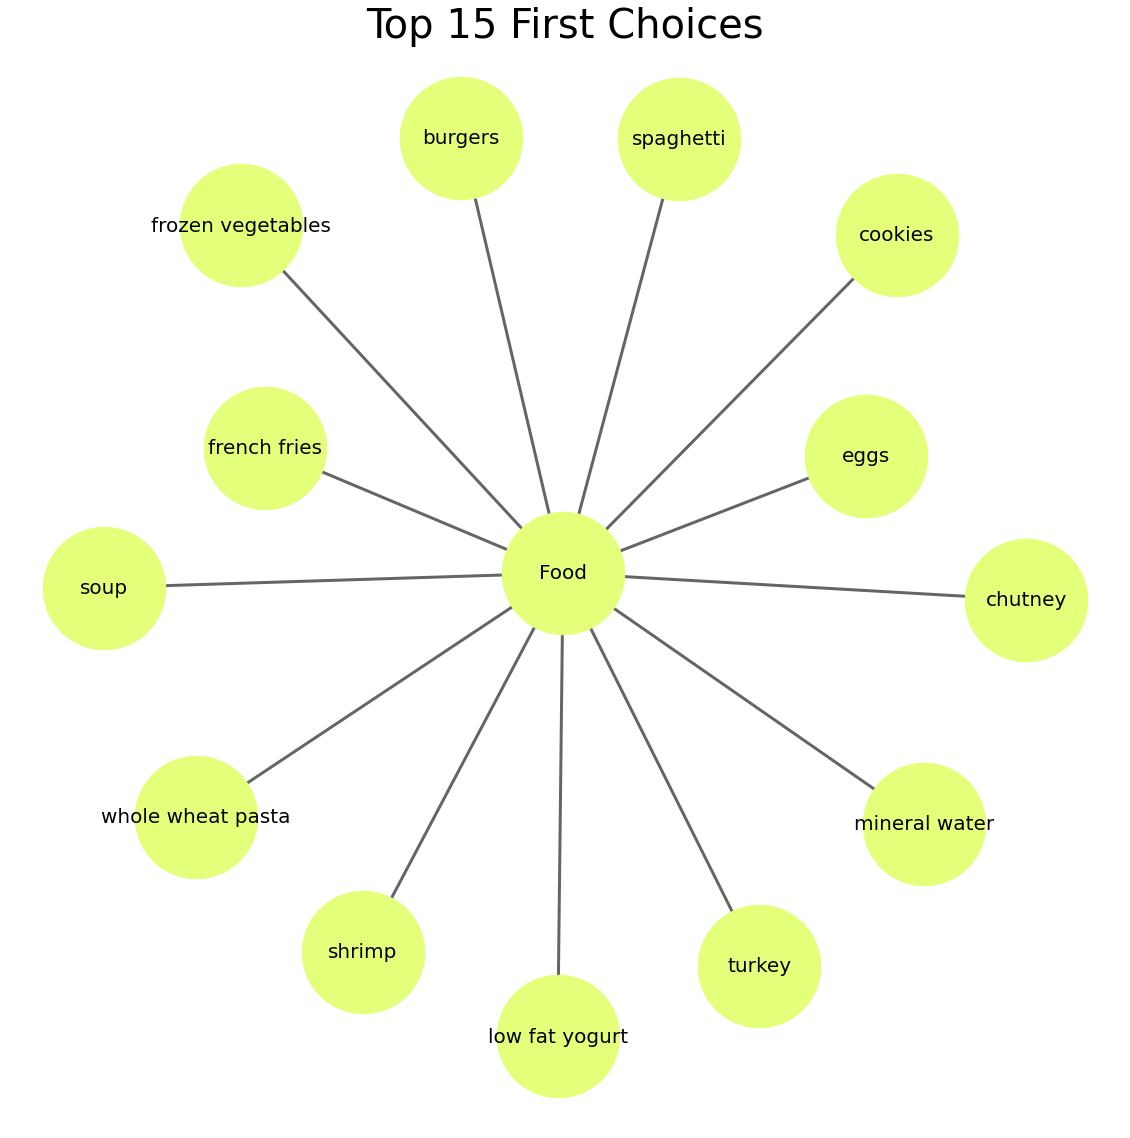

In [121]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [122]:
#Data Preprocessing
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [123]:
#Association 
#In order to use apriori function, we need to transform our dataset into a one-hot-encoded Dataframe.
#Transaction Encoder creates a Numpy array from a List and “One hot” encoded it but in True/False not in 0/1.Rules
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data.shape

(7501, 121)

In [124]:
data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'hot dogs', 'dessert wine', 'honey',
       'candy bars', 'cereals', 'oil', 'strawberries', 'yams', 'tomato sauce',
       'brownies', 'cooking oil', 'antioxydant juice', 'energy drink',
       'flax seed', 'french wine', 'cottage cheese', 'nonfat milk',
       'fromage blanc', 'protein bar', 'fresh bread', 'pasta', 'gums',
       'tomato juice', 'soda', 'almonds', 'light mayo', 'cider', 'mint',
       'rice', 'black tea', 'clothes accessories', 'green beans',
       'whole weat flour', 'spinach', 'sandwich', 'extra dark chocolate',
       'melons', 'chutney', 'mushroom cream sauce', 'white wine', 'salt',
       'strong cheese', 'green grapes', 'pet food', 'bug spray', 'bacon',
       'mint green tea', 'light cream', 'chili', 'gluten free bar',
       'magazines', 'babies food', 'shallot', 'toothpaste', 'sparkling water',
       'blueberries', 'mayonnaise', 'asparagus', 'salad','hand protein bar', 'mashed potato', 'eggplant', 'oatmeal', 'ketchup',
       'shampoo', 'cream', 'body spray', 'cauliflower', 'corn']]

data.shape

(7501, 110)

In [125]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,french fries,herb & pepper,ground beef,tomatoes,milk,escalope,fresh tuna,red wine,ham,cake,green tea,whole wheat pasta,pancakes,soup,muffins,energy bar,olive oil,champagne,pepper,avocado,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake,...,black tea,clothes accessories,green beans,whole weat flour,spinach,sandwich,extra dark chocolate,melons,chutney,mushroom cream sauce,white wine,salt,strong cheese,green grapes,pet food,bug spray,bacon,mint green tea,light cream,chili,gluten free bar,magazines,babies food,shallot,toothpaste,sparkling water,blueberries,mayonnaise,asparagus,salad,hand protein bar,mashed potato,eggplant,oatmeal,ketchup,shampoo,cream,body spray,cauliflower,corn
0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
#Support with column names
#Now, let us return the items and itemsets with at least 5% support:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
5,0.174110,(spaghetti)
6,0.071457,(shrimp)
7,0.052393,(grated cheese)
8,0.179709,(eggs)
9,0.080389,(cookies)


In [127]:
#Confidence
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815


In [128]:
#Lift
rules = association_rules(frequent_itemsets,metric="lift",min_threshold = 1.00)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
4,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
5,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158


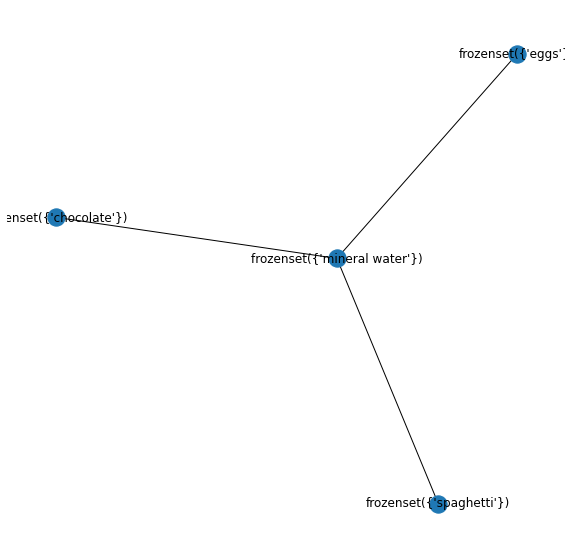

In [129]:
fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()